<a href="https://colab.research.google.com/github/joaochenriques/FFT_Testing/blob/main/FFT_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import matplotlib.pyplot as mpl

In [76]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

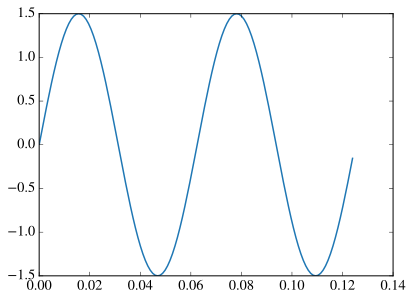

In [86]:
nFFT = 128
f = 16.0
ω = 2.0 * np.pi * f 
t = np.linspace( 0, 2.0/f, nFFT, endpoint=False )
y = 1.5 * np.sin( ω * t  )
mpl.plot( t, y )

In [82]:
fsample = 1.0 / ( t[1] - t[0] )
delta_f = fsample / nFFT

(0.74706456799262, 1.4941291359852404)

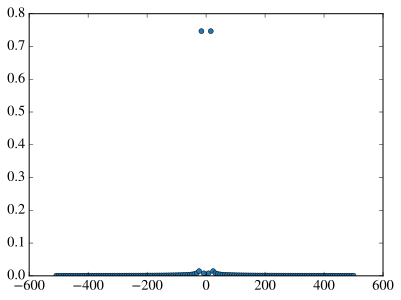

In [83]:
freqs = np.fft.fftfreq( n = nFFT, d = 1.0 / fsample )   # FFT frequencies
Amps = np.fft.fft( y, norm='backward' ) / nFFT          # FFT complex amplitudes

Spec_Af  = np.abs( Amps )                               # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                             # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                           # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )       # mean Amplitude

mpl.plot( freqs, np.abs( Amps ), 'o' )

Spec_A_mean, np.linalg.norm( Amps ) * np.sqrt(2)

(0.5282545016810416, 1.4941293613239397)

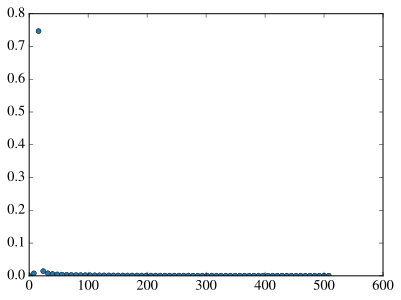

In [85]:
freqs = np.fft.rfftfreq( n = nFFT, d = 1.0 / fsample )      # FFT frequencies
Amps = np.fft.rfft( y, norm='backward' ) / nFFT             # FFT complex amplitudes

Spec_Af  = np.abs( Amps )                                   # abs amplitudes 
Spec_Var = 0.5 * Spec_Af**2                                 # Variance spectrum
Spec_Sf  = Spec_Var / delta_f                               # Spectral density

Spec_A_mean = np.sqrt( sum( Spec_Sf ) * delta_f )           # mean Amplitude

mpl.plot( freqs, np.abs( Amps ), 'o' )
Spec_A_mean, 2 * np.linalg.norm( Amps ) 